In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline

## Example grid

In [2]:
dist = pd.DataFrame({r'$\mathcal{X}$':[r'$x_1$',r'$x_2$',r'$\vdots$',r'$x_N$'],
                     'Probability':[r'$p(x_1)$',r'$p(x_2)$',r'$\vdots$',r'$p(x_N)$']})
dist[r'$i$'] = ['1','2',r'$\vdots$','N']
dist_names = [r'$i$',r'$\mathcal{X}$','Probability']
dist = dist[dist_names]

N = 5
vals = [x*5 for x in range(1,N+1)]

def xlogx(x):
    if x == 0:
        return 0
    return x*np.log2(x)

def H(x_probs):
    return -np.sum([xlogx(x) for x in x_probs])

dist

,$i$,$\mathcal{X}$,Probability
0,1,$x_1$,$p(x_1)$
1,2,$x_2$,$p(x_2)$
2,$\vdots$,$\vdots$,$\vdots$
3,N,$x_N$,$p(x_N)$


### Behavior of entropy

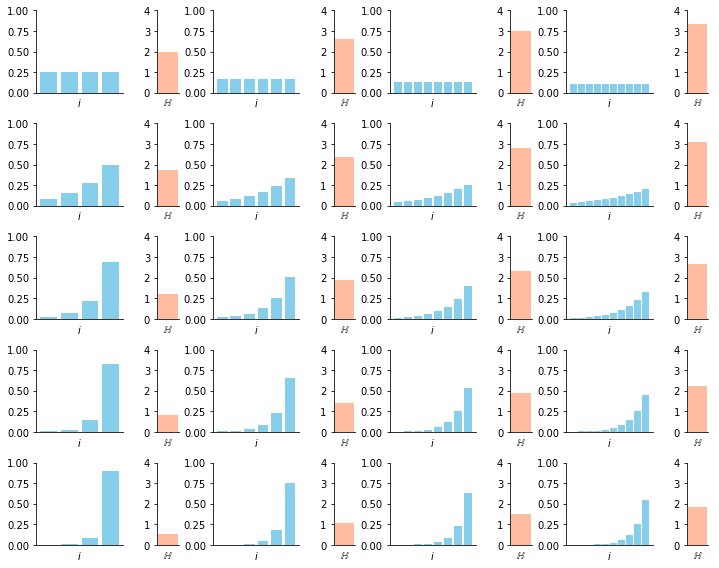

In [22]:
grids = {}

def make_probs(N, max_val):
    
    x_vals = np.exp(-np.linspace(0,max_val,N))
    x_probs = pd.Series(x_vals/np.sum(x_vals)).sort_values()
    x_probs.index = range(N)
    return x_probs

Ns = list(range(4,12,2))
max_vals = np.linspace(0,7,5)

for n in Ns:
    for mv in max_vals:
        grids[(n,mv)] = make_probs(n, mv)

def plot_grid(ax,x_probs):
    ax.bar(x_probs.index,x_probs.values, color='skyblue')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel(r'$i$')
    ax.set_ylim(0,1)
    
def plot_H(ax,x_probs):
    entropy = H(x_probs)
    ax.bar([0],entropy, color='lightsalmon',alpha=.7)
#     ax.yaxis.tick_right()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_ylim(0,4)
    ax.set_xlabel(r'$\mathbb{H}$')
    
def flatten(lst):
    list_out = []
    for sub_lst in lst:
        list_out += sub_lst
    return list_out
    
fig = plt.figure(figsize=(10,8))

gs = gridspec.GridSpec(len(max_vals),len(Ns)*2,width_ratios=flatten([[4,1]*len(Ns)]))
# gs.update(left=0.55)

for j, n in enumerate(Ns):
    for i, mv in enumerate(max_vals):
        x_probs = grids[(n,mv)]
        ax_prob = plt.subplot(gs[i,j*2])
        ax_H = plt.subplot(gs[i,j*2+1])
        plot_grid(ax_prob,x_probs)
        plot_H(ax_H,x_probs)
        
fig.tight_layout(w_pad=0.8)
fig.savefig('Entropy_behavior',dpi=150)

In [14]:
?? fig.tight_layout

## $X$, $Y$ and their joint distribution

In [7]:
X = pd.DataFrame({r'$\mathcal{X}$':[r'$x_1$',r'$x_2$',r'$\vdots$',r'$x_N$'],
                     'Probability':[r'$p_X(x_1)$',r'$p_X(x_2)$',r'$\vdots$',r'$p_X(x_N)$']})
X[r'$i$'] = ['1','2',r'$\vdots$','N']
X_names = [r'$i$',r'$\mathcal{X}$','Probability']
X = X[X_names]

Y = pd.DataFrame({r'$\mathcal{Y}$':[r'$y_1$',r'$y_2$',r'$\vdots$',r'$y_M$'],
                     'Probability':[r'$p_Y(y_1)$',r'$p_Y(y_2)$',r'$\vdots$',r'$p_Y(y_M)$']})
Y[r'$i$'] = ['1','2',r'$\vdots$','M']
Y_names = [r'$i$',r'$\mathcal{Y}$','Probability']
Y = Y[Y_names]

X

,$i$,$\mathcal{X}$,Probability
0,1,$x_1$,$p_X(x_1)$
1,2,$x_2$,$p_X(x_2)$
2,$\vdots$,$\vdots$,$\vdots$
3,N,$x_N$,$p_X(x_N)$


In [8]:
Y

,$i$,$\mathcal{Y}$,Probability
0,1,$y_1$,$p_Y(y_1)$
1,2,$y_2$,$p_Y(y_2)$
2,$\vdots$,$\vdots$,$\vdots$
3,M,$y_M$,$p_Y(y_M)$


In [14]:
XY = pd.DataFrame({r'$\mathcal{X}\times\mathcal{Y}$':[r'$(x_1,y_1)$',r'$(x_1,y_2)$',r'$\vdots$',r'$(x_N,y_M)$'],
                     'Probability':[r'$p_{X,Y}(x_1,y_1)$',r'$p_{X,Y}(x_1,y_2)$',r'$\vdots$',r'$p_{X,Y}(x_N,y_M)$']})
XY[r'$i$'] = ['1','2',r'$\vdots$','NM']
XY_names = [r'$i$',r'$\mathcal{X}\times\mathcal{Y}$','Probability']
XY = XY[XY_names]
XY

,$i$,$\mathcal{X}\times\mathcal{Y}$,Probability
0,1,"$(x_1,y_1)$","$p_{X,Y}(x_1,y_1)$"
1,2,"$(x_1,y_2)$","$p_{X,Y}(x_1,y_2)$"
2,$\vdots$,$\vdots$,$\vdots$
3,NM,"$(x_N,y_M)$","$p_{X,Y}(x_N,y_M)$"
